In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input/bpl-data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input/bpl-data/bowler.csv
../input/bpl-data/batsman.csv
../input/bpl-data/bpl.csv


## Load Datasets

In [2]:
bpl = pd.read_csv('../input/bpl-data/bpl.csv')
batsman = pd.read_csv('../input/bpl-data/batsman.csv')
bowler = pd.read_csv('../input/bpl-data/bowler.csv')

## BPL data

In [3]:
bpl.shape

(311, 19)

In [4]:
bpl.head()

,id,season,match_no,date,team_1,team_1_score,team_2,team_2_score,player_of_match,toss_winner,toss_decision,winner,venue,city,win_by_wickets,win_by_runs,result,umpire_1,umpire_2
0,0,2011/12,Final,Feb 29 2012,Barisal Burners,140/7,Dhaka Gladiators,144/2,Imran Nazir,Dhaka Gladiators,field first,Dhaka,"Shere Bangla National Stadium, Mirpur",Mirpur,8,0,8 wickets,David Orchard,Enamul Haque
1,30,2011/12,3rd,Feb 11 2012,Khulna Royal Bengals,175/5,Dhaka Gladiators,156/7,Andre Russell,Khulna Royal Bengals,bat first,Khulna,"Shere Bangla National Stadium, Mirpur",Mirpur,0,19,19 runs,Jeremy Lloyds,Sharfuddoula
2,26,2011/12,7th,Feb 13 2012,Barisal Burners,125,Khulna Royal Bengals,131/3,Dwayne Smith,Khulna Royal Bengals,field first,Khulna,"Shere Bangla National Stadium, Mirpur",Mirpur,7,0,7 wickets,Enamul Haque,Jeremy Lloyds
3,29,2011/12,4th,Feb 11 2012,Barisal Burners,180/2,Duronto Rajshahi,158/9,Ahmed Shehzad,Barisal Burners,bat first,Barisal,"Shere Bangla National Stadium, Mirpur",Mirpur,0,22,22 runs,David Orchard,Gazi Sohel
4,28,2011/12,5th,Feb 12 2012,Khulna Royal Bengals,171/3,Chittagong Kings,174/4,Nasir Jamshed,Khulna Royal Bengals,bat first,Chittagong,"Shere Bangla National Stadium, Mirpur",Mirpur,6,0,6 wickets,David Orchard,Enamul Haque


In [5]:
bpl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               311 non-null    int64 
 1   season           311 non-null    object
 2   match_no         311 non-null    object
 3   date             311 non-null    object
 4   team_1           311 non-null    object
 5   team_1_score     311 non-null    object
 6   team_2           311 non-null    object
 7   team_2_score     311 non-null    object
 8   player_of_match  311 non-null    object
 9   toss_winner      311 non-null    object
 10  toss_decision    311 non-null    object
 11  winner           311 non-null    object
 12  venue            311 non-null    object
 13  city             311 non-null    object
 14  win_by_wickets   311 non-null    int64 
 15  win_by_runs      311 non-null    int64 
 16  result           311 non-null    object
 17  umpire_1         311 non-null    ob

In [6]:
bpl['id'].value_counts().keys().sort_values()

Int64Index([  0,   1,   2,   4,   5,   6,   7,   8,   9,  10,
            ...
            710, 711, 712, 713, 714, 715, 716, 717, 718, 719],
           dtype='int64', length=290)

## Batsman Data

In [7]:
batsman.shape

(5048, 12)

In [8]:
batsman.head()

,id,season,match_no,date,player_name,comment,R,B,M,fours,sixs,SR
0,31,2011/12,2nd,Feb 10 2012,Tamim Iqbal,c Samuels b Mohammad Sami,3,7,10,0,0,42.85
1,31,2011/12,2nd,Feb 10 2012,Jahurul Islam,c †Mushfiqur Rahim b Ervine,11,13,21,0,1,84.61
2,0,2011/12,Final,Feb 29 2012,Ahmed Shehzad,NaN,28,20,21,3,1,140.00
3,30,2011/12,3rd,Feb 11 2012,Shivnarine Chanderpaul,b Azhar Mahmood,19,15,24,2,1,126.66
4,29,2011/12,4th,Feb 11 2012,Ahmed Shehzad,c Syed Rasel b Abdul Razzaq,67,40,62,4,6,167.50


In [9]:
batsman['id'].value_counts().keys().sort_values()

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            710, 711, 712, 713, 714, 715, 716, 717, 718, 719],
           dtype='int64', length=291)

In [10]:
batsman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048 entries, 0 to 5047
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           5048 non-null   int64 
 1   season       5048 non-null   object
 2   match_no     5048 non-null   object
 3   date         5048 non-null   object
 4   player_name  5048 non-null   object
 5   comment      2254 non-null   object
 6   R            5048 non-null   object
 7   B            5048 non-null   object
 8   M            5048 non-null   object
 9   fours        5048 non-null   object
 10  sixs         5048 non-null   object
 11  SR           5048 non-null   object
dtypes: int64(1), object(11)
memory usage: 473.4+ KB


## Bowler Data

In [11]:
bowler.shape

(3601, 12)

In [12]:
bowler.head()

,id,season,match_no,date,player_name,O,M,R,W,ECON,WD,NB
0,0,2011/12,Final,Feb 29 2012,Mashrafe Mortaza,2.0,0,17,0,8.50,0,0
1,0,2011/12,Final,Feb 29 2012,Azhar Mahmood,2.0,0,25,0,12.50,0,1
2,32,2011/12,1st,Feb 10 2012,Yasir Arafat,4.0,0,33,2,8.25,2,0
3,29,2011/12,4th,Feb 11 2012,Syed Rasel,3.0,0,33,0,11.00,2,0
4,28,2011/12,5th,Feb 12 2012,Dwayne Bravo,4.0,0,34,1,8.50,3,1


In [13]:
bowler['id'].value_counts().keys().sort_values()

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            710, 711, 712, 713, 714, 715, 716, 717, 718, 719],
           dtype='int64', length=291)

In [14]:
bowler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           3601 non-null   int64  
 1   season       3601 non-null   object 
 2   match_no     3601 non-null   object 
 3   date         3601 non-null   object 
 4   player_name  3601 non-null   object 
 5   O            3601 non-null   float64
 6   M            3601 non-null   int64  
 7   R            3601 non-null   int64  
 8   W            3601 non-null   int64  
 9   ECON         3601 non-null   float64
 10  WD           3601 non-null   int64  
 11  NB           3601 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 337.7+ KB


## Data Cleaning and Processing 
### bpl 

In [15]:
bpl['team_1'].value_counts()

Chittagong Vikings        28
Dhaka Dynamites           28
Rangpur Riders            27
Khulna Titans             24
Comilla Victorians        23
Rajshahi Kings            16
Dhaka Gladiators          15
Sylhet Sixers             15
Khulna Royal Bengals      14
Barisal Bulls             14
Chattogram Challengers    13
Chittagong Kings          12
Barisal Burners           11
Duronto Rajshahi          10
Sylhet Royals             10
Sylhet Thunder             9
Dhaka Platoon              9
Rangpur Rangers            6
Khulna Tigers              6
Rajshahi Royals            5
Cumilla Warriors           4
Fortune Barishal           4
Minister Group Dhaka       3
Sylhet Sunrisers           3
Sylhet Super Stars         2
Name: team_1, dtype: int64

In [16]:
bpl['team_2'].value_counts()

Rangpur Riders            38
Comilla Victorians        34
Dhaka Dynamites           24
Rajshahi Kings            23
Chittagong Vikings        19
Khulna Titans             14
Duronto Rajshahi          14
Khulna Tigers             14
Chittagong Kings          13
Barisal Burners           13
Sylhet Royals             13
Dhaka Gladiators          11
Rajshahi Royals           10
Barisal Bulls             10
Chattogram Challengers     9
Khulna Royal Bengals       8
Sylhet Sixers              8
Sylhet Super Stars         8
Cumilla Warriors           8
Rangpur Rangers            6
Dhaka Platoon              4
Sylhet Thunder             3
Minister Group Dhaka       3
Fortune Barishal           2
Sylhet Sunrisers           2
Name: team_2, dtype: int64

In [17]:
bpl['winner'].value_counts()

Victorians     37
Riders         35
Dynamites      30
Dhaka          21
Royals         21
Kings          18
Vikings        17
Titans         16
Chittagong     13
Challengers    12
Rajshahi       12
Bulls          12
Tigers         12
Barisal        11
Sixers          9
Khulna          8
Platoon         7
Rangers         5
Warriors        4
Barishal        4
Super           3
Match           2
Thunder         1
Sunrisers       1
Name: winner, dtype: int64

In [18]:
bpl['toss_winner'].value_counts()

Rangpur Riders            34
Comilla Victorians        27
Dhaka Dynamites           25
Rajshahi Kings            22
Khulna Titans             21
Chittagong Vikings        21
Dhaka Gladiators          15
Barisal Burners           13
Khulna Tigers             13
Khulna Royal Bengals      12
Sylhet Royals             12
Sylhet Sixers             11
Barisal Bulls             11
Duronto Rajshahi          11
Chittagong Kings          10
Rajshahi Royals            9
Chattogram Challengers     8
Cumilla Warriors           8
Rangpur Rangers            6
Sylhet Super Stars         5
Sylhet Thunder             5
Fortune Barishal           4
Dhaka Platoon              3
Minister Group Dhaka       3
Sylhet Sunrisers           2
Name: toss_winner, dtype: int64

### Team name convert in their own division in winner, toss_winner, team_1 and team_2 columns

In [19]:
bpl['winner'].value_counts()

Victorians     37
Riders         35
Dynamites      30
Dhaka          21
Royals         21
Kings          18
Vikings        17
Titans         16
Chittagong     13
Challengers    12
Rajshahi       12
Bulls          12
Tigers         12
Barisal        11
Sixers          9
Khulna          8
Platoon         7
Rangers         5
Warriors        4
Barishal        4
Super           3
Match           2
Thunder         1
Sunrisers       1
Name: winner, dtype: int64

In [20]:
# Match means is tied 
bpl['winner'].replace('', 'NaN', inplace=True)

In [21]:
bpl[bpl['winner'] == 'NaN']

,id,season,match_no,date,team_1,team_1_score,team_2,team_2_score,player_of_match,toss_winner,toss_decision,winner,venue,city,win_by_wickets,win_by_runs,result,umpire_1,umpire_2


#### Team 1 and team 2 name correction

In [22]:
teams = {
    "Dhaka": ['Dhaka Dynamites', 'Dhaka Platoon', 'Minister Group Dhaka', 'Dhaka Gladiators'], 
    "Chittagong": ['Chattogram Challengers', 'Chittagong Vikings', 'Chittagong Kings'],
    "Barishal": ['Fortune Barishal', 'Barisal Burners', 'Barisal', 'Barishal', 'Barisal Bulls'],
    "Sylhet": ['Sylhet Sunrisers', 'Sylhet Royals', 'Sylhet Sixers', 'Sylhet Super Stars', 'Sylhet Thunder'],
    "Rajshahi": ['Rajshahi Kings', 'Rajshahi Royals', 'Duronto Rajshahi'],
    "Comilla": ['Comilla Victorians', 'Cumilla Warriors'],
    "Khulna": ['Khulna Titans', 'Khulna Royal Bengals', 'Khulna Tigers'],
    "Rangpur": ['Rangpur Rangers', 'Rangpur Riders']    
}

for k, v in teams.items():
    for name in v:
        bpl['team_1'].replace(name, k, inplace=True)
        bpl['team_2'].replace(name, k, inplace=True)
        bpl['toss_winner'].replace(name, k, inplace=True)
        for n in name.split(' '):
            bpl['winner'].replace(n, k, inplace=True)

In [23]:
bpl['team_1'].value_counts()

Dhaka         55
Chittagong    53
Khulna        44
Sylhet        39
Rangpur       33
Rajshahi      31
Barishal      29
Comilla       27
Name: team_1, dtype: int64

In [24]:
bpl['team_2'].value_counts()

Rajshahi      47
Rangpur       44
Dhaka         42
Comilla       42
Chittagong    41
Khulna        36
Sylhet        34
Barishal      25
Name: team_2, dtype: int64

In [25]:
bpl['toss_winner'].value_counts()

Dhaka         46
Khulna        46
Rajshahi      42
Rangpur       40
Chittagong    39
Sylhet        35
Comilla       35
Barishal      28
Name: toss_winner, dtype: int64

In [26]:
bpl['winner'].value_counts()

Chittagong    60
Dhaka         58
Comilla       41
Rangpur       40
Khulna        36
Sylhet        35
Barishal      27
Rajshahi      12
Match          2
Name: winner, dtype: int64

In [27]:
bpl.head()

,id,season,match_no,date,team_1,team_1_score,team_2,team_2_score,player_of_match,toss_winner,toss_decision,winner,venue,city,win_by_wickets,win_by_runs,result,umpire_1,umpire_2
0,0,2011/12,Final,Feb 29 2012,Barishal,140/7,Dhaka,144/2,Imran Nazir,Dhaka,field first,Dhaka,"Shere Bangla National Stadium, Mirpur",Mirpur,8,0,8 wickets,David Orchard,Enamul Haque
1,30,2011/12,3rd,Feb 11 2012,Khulna,175/5,Dhaka,156/7,Andre Russell,Khulna,bat first,Khulna,"Shere Bangla National Stadium, Mirpur",Mirpur,0,19,19 runs,Jeremy Lloyds,Sharfuddoula
2,26,2011/12,7th,Feb 13 2012,Barishal,125,Khulna,131/3,Dwayne Smith,Khulna,field first,Khulna,"Shere Bangla National Stadium, Mirpur",Mirpur,7,0,7 wickets,Enamul Haque,Jeremy Lloyds
3,29,2011/12,4th,Feb 11 2012,Barishal,180/2,Rajshahi,158/9,Ahmed Shehzad,Barishal,bat first,Barishal,"Shere Bangla National Stadium, Mirpur",Mirpur,0,22,22 runs,David Orchard,Gazi Sohel
4,28,2011/12,5th,Feb 12 2012,Khulna,171/3,Chittagong,174/4,Nasir Jamshed,Khulna,bat first,Chittagong,"Shere Bangla National Stadium, Mirpur",Mirpur,6,0,6 wickets,David Orchard,Enamul Haque


In [28]:
bpl[['team_1_run','team_1_wicket']] = bpl.team_1_score.str.split('/',expand=True)
bpl["team_1_wicket"].fillna(0, inplace = True)
bpl['team_1_wicket'] = pd.to_numeric(bpl['team_1_wicket'])
bpl['team_1_run'] = pd.to_numeric(bpl['team_1_run'])


bpl[['team_2_run','team_2_wicket']] = bpl.team_2_score.str.split('/',expand=True)
bpl["team_2_wicket"].fillna(0, inplace = True)
bpl['team_2_wicket'] = pd.to_numeric(bpl['team_2_wicket'])
bpl['team_2_run'] = pd.to_numeric(bpl['team_2_run'])

bpl.head()

,id,season,match_no,date,team_1,team_1_score,team_2,team_2_score,player_of_match,toss_winner,...,city,win_by_wickets,win_by_runs,result,umpire_1,umpire_2,team_1_run,team_1_wicket,team_2_run,team_2_wicket
0,0,2011/12,Final,Feb 29 2012,Barishal,140/7,Dhaka,144/2,Imran Nazir,Dhaka,...,Mirpur,8,0,8 wickets,David Orchard,Enamul Haque,140,7,144,2
1,30,2011/12,3rd,Feb 11 2012,Khulna,175/5,Dhaka,156/7,Andre Russell,Khulna,...,Mirpur,0,19,19 runs,Jeremy Lloyds,Sharfuddoula,175,5,156,7
2,26,2011/12,7th,Feb 13 2012,Barishal,125,Khulna,131/3,Dwayne Smith,Khulna,...,Mirpur,7,0,7 wickets,Enamul Haque,Jeremy Lloyds,125,0,131,3
3,29,2011/12,4th,Feb 11 2012,Barishal,180/2,Rajshahi,158/9,Ahmed Shehzad,Barishal,...,Mirpur,0,22,22 runs,David Orchard,Gazi Sohel,180,2,158,9
4,28,2011/12,5th,Feb 12 2012,Khulna,171/3,Chittagong,174/4,Nasir Jamshed,Khulna,...,Mirpur,6,0,6 wickets,David Orchard,Enamul Haque,171,3,174,4


In [29]:
bpl.drop('team_1_score', axis=1, inplace=True)
bpl.drop('team_2_score', axis=1, inplace=True)

In [30]:
bpl.head()

,id,season,match_no,date,team_1,team_2,player_of_match,toss_winner,toss_decision,winner,...,city,win_by_wickets,win_by_runs,result,umpire_1,umpire_2,team_1_run,team_1_wicket,team_2_run,team_2_wicket
0,0,2011/12,Final,Feb 29 2012,Barishal,Dhaka,Imran Nazir,Dhaka,field first,Dhaka,...,Mirpur,8,0,8 wickets,David Orchard,Enamul Haque,140,7,144,2
1,30,2011/12,3rd,Feb 11 2012,Khulna,Dhaka,Andre Russell,Khulna,bat first,Khulna,...,Mirpur,0,19,19 runs,Jeremy Lloyds,Sharfuddoula,175,5,156,7
2,26,2011/12,7th,Feb 13 2012,Barishal,Khulna,Dwayne Smith,Khulna,field first,Khulna,...,Mirpur,7,0,7 wickets,Enamul Haque,Jeremy Lloyds,125,0,131,3
3,29,2011/12,4th,Feb 11 2012,Barishal,Rajshahi,Ahmed Shehzad,Barishal,bat first,Barishal,...,Mirpur,0,22,22 runs,David Orchard,Gazi Sohel,180,2,158,9
4,28,2011/12,5th,Feb 12 2012,Khulna,Chittagong,Nasir Jamshed,Khulna,bat first,Chittagong,...,Mirpur,6,0,6 wickets,David Orchard,Enamul Haque,171,3,174,4


In [31]:
bpl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               311 non-null    int64 
 1   season           311 non-null    object
 2   match_no         311 non-null    object
 3   date             311 non-null    object
 4   team_1           311 non-null    object
 5   team_2           311 non-null    object
 6   player_of_match  311 non-null    object
 7   toss_winner      311 non-null    object
 8   toss_decision    311 non-null    object
 9   winner           311 non-null    object
 10  venue            311 non-null    object
 11  city             311 non-null    object
 12  win_by_wickets   311 non-null    int64 
 13  win_by_runs      311 non-null    int64 
 14  result           311 non-null    object
 15  umpire_1         311 non-null    object
 16  umpire_2         311 non-null    object
 17  team_1_run       311 non-null    in

In [32]:
bpl.describe()

,id,win_by_wickets,win_by_runs,team_1_run,team_1_wicket,team_2_run,team_2_wicket
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,284.755627,3.186495,15.627010,154.733119,5.450161,140.254019,4.019293
std,228.051532,3.449723,24.626548,32.516837,2.613228,30.119811,3.054285
min,0.000000,0.000000,0.000000,44.000000,0.000000,45.000000,0.000000
25%,57.500000,0.000000,0.000000,135.000000,4.000000,125.500000,1.000000
50%,230.000000,2.000000,0.000000,156.000000,6.000000,142.000000,4.000000
75%,513.500000,6.000000,23.000000,176.000000,7.000000,160.000000,7.000000
max,719.000000,10.000000,119.000000,239.000000,9.000000,222.000000,9.000000


In [33]:
bpl[bpl['win_by_runs'] > 100]

,id,season,match_no,date,team_1,team_2,player_of_match,toss_winner,toss_decision,winner,...,city,win_by_wickets,win_by_runs,result,umpire_1,umpire_2,team_1_run,team_1_wicket,team_2_run,team_2_wicket
70,541,2018/19,5th,Jan 8 2019,Dhaka,Khulna,Hazratullah Zazai,Khulna,field first,Dhaka,...,Mirpur,0,105,105 runs,Alex Wharf,Nadir Shah,192,6,87,0
140,644,2019/20,2nd,Dec 11 2019,Comilla,Rangpur,Dasun Shanaka,Comilla,bat first,Comilla,...,Mirpur,0,105,105 runs,Masudur Rahman,Tanvir Ahmed,173,7,68,0
276,115,2012/13,32nd,Feb 8 2013,Chittagong,Sylhet,Brendan Taylor,Sylhet,field first,Chittagong,...,Mirpur,0,119,119 runs,Gazi Sohel,Richard Illingworth,193,4,74,0


In [34]:
batsman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048 entries, 0 to 5047
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           5048 non-null   int64 
 1   season       5048 non-null   object
 2   match_no     5048 non-null   object
 3   date         5048 non-null   object
 4   player_name  5048 non-null   object
 5   comment      2254 non-null   object
 6   R            5048 non-null   object
 7   B            5048 non-null   object
 8   M            5048 non-null   object
 9   fours        5048 non-null   object
 10  sixs         5048 non-null   object
 11  SR           5048 non-null   object
dtypes: int64(1), object(11)
memory usage: 473.4+ KB


### Batsman data processing

In [35]:
batsman['R'] = pd.to_numeric(batsman['R'].replace('-', 0))
batsman['B'] = pd.to_numeric(batsman['B'].replace('-', 0))
batsman['M'] = pd.to_numeric(batsman['M'].replace('-', 0))
batsman['fours'] = pd.to_numeric(batsman['fours'].replace('-', 0))
batsman['sixs'] = pd.to_numeric(batsman['sixs'].replace('-', 0))
batsman['SR'] = pd.to_numeric(batsman['SR'].replace('-', 0))

In [36]:
batsman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048 entries, 0 to 5047
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           5048 non-null   int64  
 1   season       5048 non-null   object 
 2   match_no     5048 non-null   object 
 3   date         5048 non-null   object 
 4   player_name  5048 non-null   object 
 5   comment      2254 non-null   object 
 6   R            5048 non-null   int64  
 7   B            5048 non-null   int64  
 8   M            5048 non-null   int64  
 9   fours        5048 non-null   int64  
 10  sixs         5048 non-null   int64  
 11  SR           5048 non-null   float64
dtypes: float64(1), int64(6), object(5)
memory usage: 473.4+ KB


In [37]:
batsman.describe()

,id,R,B,M,fours,sixs,SR
count,5048.000000,5048.000000,5048.000000,5048.000000,5048.000000,5048.000000,5048.000000
mean,283.641244,17.306062,14.234350,11.635301,1.491878,0.674128,102.256389
std,228.449500,19.332040,12.772194,18.523472,1.993534,1.259082,66.884194
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.000000,3.000000,4.000000,0.000000,0.000000,0.000000,56.452500
50%,229.000000,10.000000,10.000000,2.000000,1.000000,0.000000,100.000000
75%,514.000000,25.000000,21.000000,16.000000,2.000000,1.000000,140.000000
max,719.000000,146.000000,73.000000,103.000000,17.000000,18.000000,600.000000


In [38]:
batsman[batsman['R'] >= 146]

,id,season,match_no,date,player_name,comment,R,B,M,fours,sixs,SR
4491,40,2017/18,Final,Dec 12 2017,Chris Gayle,not out,146,69,0,5,18,211.59


In [39]:
batsman[batsman['SR'] >= 300]

,id,season,match_no,date,player_name,comment,R,B,M,fours,sixs,SR
63,32,2011/12,1st,Feb 10 2012,Scott Styris,not out,7,2,3,0,1,350.00
64,28,2011/12,5th,Feb 12 2012,Shakib Al Hasan,not out,4,1,1,1,0,400.00
212,24,2011/12,9th,Feb 14 2012,Syed Rasel,not out,6,2,3,1,0,300.00
509,624,2019/20,22nd,Dec 27 2019,Robbie Frylinck,run out (Mohammad Nabi/†Jahurul Islam),9,3,0,0,1,300.00
552,615,2019/20,31st,Jan 3 2020,Asif Ali,not out,39,13,0,2,4,300.00
612,634,2019/20,12th,Dec 18 2019,Mashrafe Mortaza,c Imrul Kayes b Nasir Hossain,23,6,0,1,3,383.33
724,619,2019/20,27th,Dec 31 2019,Mujeeb Ur Rahman,not out,4,1,0,1,0,400.00
849,65,2019/20,41st,Jan 11 2020,Ziaur Rahman,not out,7,2,0,0,1,350.00
873,718,2021/22,2nd,Jan 21 2022,Isuru Udana,not out,6,2,2,1,0,300.00
874,68,2019/20,38th,Jan 8 2020,Mashrafe Mortaza,c Mohammad Nabi b Mustafizur Rahman,6,2,0,0,1,300.00


In [40]:
batsman[batsman['sixs'] >= 10]

,id,season,match_no,date,player_name,comment,R,B,M,fours,sixs,SR
135,32,2011/12,1st,Feb 10 2012,Chris Gayle,not out,101,44,56,7,10,229.54
201,23,2011/12,10th,Feb 14 2012,Chris Gayle,b Azhar Mahmood,116,61,84,6,11,190.16
2504,43,2017/18,"Eliminator,",Dec 8 2017,Chris Gayle,not out,126,51,0,6,14,247.05
2989,14,2012/13,Race,Feb 15 2013,Chris Gayle,NaN,114,51,90,5,12,223.52
3630,513,2018/19,33rd,Jan 28 2019,Evin Lewis,not out,109,49,0,5,10,222.44
4491,40,2017/18,Final,Dec 12 2017,Chris Gayle,not out,146,69,0,5,18,211.59
4739,50,2018/19,Final,Feb 8 2019,Tamim Iqbal,not out,141,61,0,10,11,231.14


In [41]:
bowler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           3601 non-null   int64  
 1   season       3601 non-null   object 
 2   match_no     3601 non-null   object 
 3   date         3601 non-null   object 
 4   player_name  3601 non-null   object 
 5   O            3601 non-null   float64
 6   M            3601 non-null   int64  
 7   R            3601 non-null   int64  
 8   W            3601 non-null   int64  
 9   ECON         3601 non-null   float64
 10  WD           3601 non-null   int64  
 11  NB           3601 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 337.7+ KB


In [42]:
bowler.describe()

,id,O,M,R,W,ECON,WD,NB
count,3601.00000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000
mean,282.93835,3.160233,0.037212,23.827270,0.990558,7.883838,0.590947,0.071924
std,227.61957,1.014769,0.190769,10.011113,1.024923,3.183889,0.895431,0.294567
min,0.00000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.00000,2.300000,0.000000,17.000000,0.000000,5.750000,0.000000,0.000000
50%,230.00000,4.000000,0.000000,23.000000,1.000000,7.500000,0.000000,0.000000
75%,513.00000,4.000000,0.000000,30.000000,2.000000,9.500000,1.000000,0.000000
max,719.00000,4.000000,2.000000,60.000000,6.000000,27.000000,7.000000,3.000000


In [43]:
bowler[bowler['W'] > 4]

,id,season,match_no,date,player_name,O,M,R,W,ECON,WD,NB
309,425,2017/18,21st,Nov 20 2017,Hasan Ali,3.3,0,20,5,5.71,0,0
397,422,2017/18,24th,Nov 21 2017,Shakib Al Hasan,3.5,0,16,5,4.17,0,0
498,49,2017/18,37th,Dec 3 2017,Nasir Hossain,4.0,0,31,5,7.75,1,0
551,416,2017/18,30th,Nov 27 2017,Shafiul Islam,4.0,0,26,5,6.50,1,0
1782,343,2016/17,3rd,Nov 9 2016,Abul Hasan,4.0,0,28,5,7.00,0,0
1881,228,2015/16,6th,Nov 24 2015,Al-Amin Hossain,4.0,0,36,5,9.00,0,0
1892,230,2015/16,4th,Nov 23 2015,Kevon Cooper,4.0,1,15,5,3.75,0,0
2162,23,2015/16,Qualifier,Dec 12 2015,Thisara Perera,4.0,0,26,5,6.50,3,0
2362,330,2016/17,16th,Nov 18 2016,Taskin Ahmed,4.0,0,31,5,7.75,0,0
2540,36,2016/17,40th,Dec 3 2016,Afif Hossain,4.0,1,21,5,5.25,0,0


## Data Visualization

### Winner Teams

In [44]:
winner_teams = bpl[bpl.winner != 'NaN']['winner'].value_counts()
winner_teams

Chittagong    60
Dhaka         58
Comilla       41
Rangpur       40
Khulna        36
Sylhet        35
Barishal      27
Rajshahi      12
Match          2
Name: winner, dtype: int64

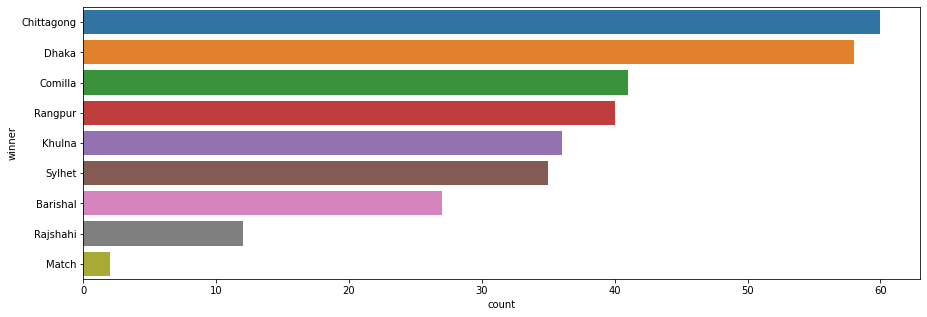

In [45]:
plt.figure(figsize = (15, 5))

sns.countplot(y = 'winner', data = bpl, order = winner_teams.index)

plt.show()


### Winner Teams in each season

In [46]:
bpl['season'].value_counts()
bpl[bpl['season'] == '2012/13']['winner'].value_counts()

Dhaka         11
Sylhet         9
Chittagong     8
Rajshahi       5
Barishal       5
Rangpur        5
Khulna         3
Name: winner, dtype: int64

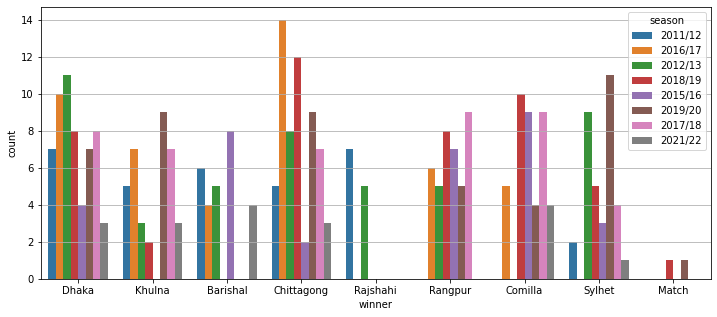

In [47]:
plt.figure(figsize = (12, 5))

sns.countplot(x = 'winner', data = bpl, hue="season")
plt.grid(axis = 'y')
plt.show()

In [48]:
bpl.groupby('season')['winner'].value_counts()


season   winner    
2011/12  Dhaka          7
         Rajshahi       7
         Barishal       6
         Chittagong     5
         Khulna         5
         Sylhet         2
2012/13  Dhaka         11
         Sylhet         9
         Chittagong     8
         Barishal       5
         Rajshahi       5
         Rangpur        5
         Khulna         3
2015/16  Comilla        9
         Barishal       8
         Rangpur        7
         Dhaka          4
         Sylhet         3
         Chittagong     2
2016/17  Chittagong    14
         Dhaka         10
         Khulna         7
         Rangpur        6
         Comilla        5
         Barishal       4
2017/18  Comilla        9
         Rangpur        9
         Dhaka          8
         Chittagong     7
         Khulna         7
         Sylhet         4
2018/19  Chittagong    12
         Comilla       10
         Dhaka          8
         Rangpur        8
         Sylhet         5
         Khulna         2
         Match    

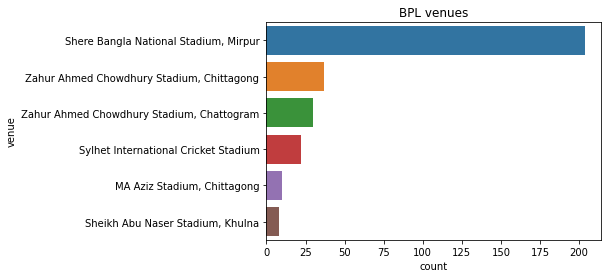

In [49]:
plt.title("BPL venues")
sns.countplot(y='venue', data=bpl, order = bpl['venue'].value_counts().index)
plt.show()

#### top ten player of match

In [50]:
bpl['player_of_match'].value_counts()[:10]

Shakib Al Hasan    11
Mahmudullah         9
Shahid Afridi       7
Ravi Bopara         7
Mushfiqur Rahim     7
Chris Gayle         7
Tamim Iqbal         6
Evin Lewis          6
Andre Russell       6
Daren Sammy         5
Name: player_of_match, dtype: int64

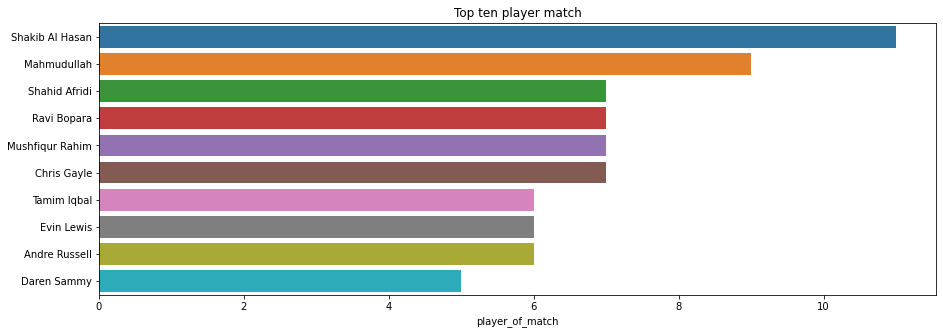

In [51]:
plt.figure(figsize = (15, 5))
plt.title('Top ten player match')
sns.barplot(y=bpl['player_of_match'].value_counts()[:10].keys(), x=bpl['player_of_match'].value_counts()[:10])
plt.show()

#### The team that won the most number of toss

In [52]:
toss_winner = bpl.toss_winner.value_counts()
toss_winner

Dhaka         46
Khulna        46
Rajshahi      42
Rangpur       40
Chittagong    39
Sylhet        35
Comilla       35
Barishal      28
Name: toss_winner, dtype: int64

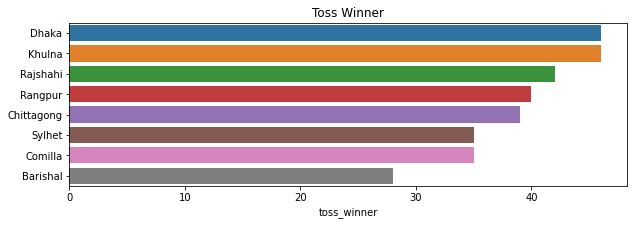

In [53]:
plt.figure(figsize = (10, 3))
plt.title('Toss Winner')
sns.barplot(y=bpl['toss_winner'].value_counts().keys(), x=toss_winner)
plt.show()

### Toss winner and match winner

In [54]:
bpl[bpl['toss_winner'] == bpl['winner']]['winner'].value_counts()

Dhaka         23
Khulna        19
Rangpur       19
Comilla       19
Chittagong    18
Barishal      15
Sylhet        15
Rajshahi       5
Name: winner, dtype: int64

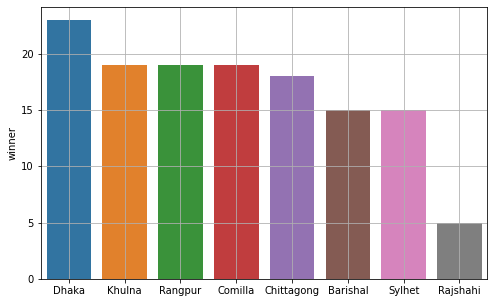

In [55]:
plt.figure(figsize = (8,5))
sns.barplot(x=bpl[bpl['toss_winner'] == bpl['winner']]['winner'].value_counts().keys(), y=bpl[bpl['toss_winner'] == bpl['winner']]['winner'].value_counts())
plt.grid()
plt.show()

### Toss winner and bat first 

In [56]:
bat = bpl[bpl['win_by_runs'] != 0] 
field = bpl[bpl['win_by_wickets'] != 0] 


In [57]:
bpl[(bpl['toss_decision'] == 'bat first') & (bpl['toss_winner'] == bpl['winner'])]['toss_winner'].value_counts()

Dhaka         12
Khulna         6
Barishal       6
Rangpur        5
Rajshahi       4
Chittagong     3
Sylhet         3
Comilla        1
Name: toss_winner, dtype: int64

In [58]:
bpl[(bpl['toss_decision'] == 'field first') & (bpl['toss_winner'] == bpl['winner'])]['toss_winner'].value_counts()

Comilla       18
Chittagong    15
Rangpur       14
Khulna        13
Sylhet        12
Dhaka         11
Barishal       9
Rajshahi       1
Name: toss_winner, dtype: int64

### Bat first and winner

In [59]:
bpl[(bpl['toss_decision'] == 'bat first') | (bpl['toss_decision'] == 'field first') & (bpl['toss_winner'] != bpl['winner'])]

,id,season,match_no,date,team_1,team_2,player_of_match,toss_winner,toss_decision,winner,...,city,win_by_wickets,win_by_runs,result,umpire_1,umpire_2,team_1_run,team_1_wicket,team_2_run,team_2_wicket
1,30,2011/12,3rd,Feb 11 2012,Khulna,Dhaka,Andre Russell,Khulna,bat first,Khulna,...,Mirpur,0,19,19 runs,Jeremy Lloyds,Sharfuddoula,175,5,156,7
3,29,2011/12,4th,Feb 11 2012,Barishal,Rajshahi,Ahmed Shehzad,Barishal,bat first,Barishal,...,Mirpur,0,22,22 runs,David Orchard,Gazi Sohel,180,2,158,9
4,28,2011/12,5th,Feb 12 2012,Khulna,Chittagong,Nasir Jamshed,Khulna,bat first,Chittagong,...,Mirpur,6,0,6 wickets,David Orchard,Enamul Haque,171,3,174,4
5,31,2011/12,2nd,Feb 10 2012,Chittagong,Rajshahi,Dwayne Bravo,Chittagong,bat first,Chittagong,...,Mirpur,0,53,53 runs,Jeremy Lloyds,Sharfuddoula,206,4,153,0
7,27,2011/12,6th,Feb 12 2012,Sylhet,Dhaka,Anamul Haque,Sylhet,bat first,Dhaka,...,Mirpur,7,0,7 wickets,Jeremy Lloyds,Sharfuddoula,124,0,126,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,10,2011/12,23rd,Feb 24 2012,Chittagong,Dhaka,Dwayne Bravo,Dhaka,field first,Chittagong,...,Mirpur,0,13,13 runs,David Orchard,Nadir Shah,120,6,107,9
305,7,2011/12,26th,Feb 25 2012,Sylhet,Chittagong,Peter Trego,Chittagong,field first,Sylhet,...,Mirpur,0,35,35 runs,David Orchard,Masudur Rahman,165,3,130,8
306,6,2011/12,27th,Feb 26 2012,Khulna,Rajshahi,Sean Ervine,Khulna,bat first,Rajshahi,...,Mirpur,8,0,8 wickets,David Orchard,Nadir Shah,106,0,110,2
308,4,2011/12,29th,Feb 27 2012,Dhaka,Rajshahi,Mohammad Sami,Dhaka,bat first,Rajshahi,...,Mirpur,3,0,3 wickets,Mahfuzur Rahman,Nadir Shah,116,0,120,7


In [60]:
bat_winner = bpl[(bpl['toss_decision'] == 'bat first') | (bpl['toss_decision'] == 'field first') & (bpl['toss_winner'] != bpl['winner'])]['winner'].value_counts()
bat_winner

Dhaka         47
Chittagong    45
Rangpur       26
Khulna        23
Comilla       23
Sylhet        23
Barishal      18
Rajshahi      11
Match          2
Name: winner, dtype: int64

In [61]:
matches_number =  bpl[bpl.winner != 'Nan'].winner.value_counts()
matches_number

Chittagong    60
Dhaka         58
Comilla       41
Rangpur       40
Khulna        36
Sylhet        35
Barishal      27
Rajshahi      12
Match          2
Name: winner, dtype: int64

In [62]:
field_winner = matches_number.sum() - bat_winner.sum()
print(f'All matches {matches_number.sum()} \nbat first and won {bat_winner.sum()} \nfield first and won {field_winner}')

All matches 311 
bat first and won 218 
field first and won 93


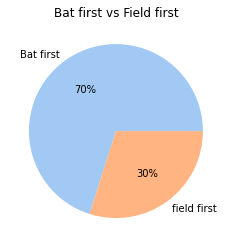

In [63]:
data = [bat_winner.sum(), field_winner]
labels = ['Bat first', 'field first']
plt.title('Bat first vs Field first')
colors = sns.color_palette('pastel')

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

<AxesSubplot:>

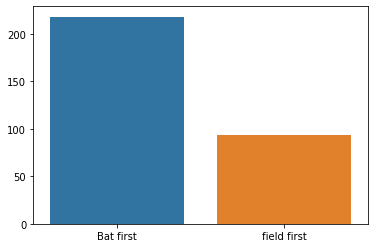

In [64]:
sns.barplot(y=data, x=labels)

### top ten wickets taken bowler

In [65]:
bowler.head()

,id,season,match_no,date,player_name,O,M,R,W,ECON,WD,NB
0,0,2011/12,Final,Feb 29 2012,Mashrafe Mortaza,2.0,0,17,0,8.50,0,0
1,0,2011/12,Final,Feb 29 2012,Azhar Mahmood,2.0,0,25,0,12.50,0,1
2,32,2011/12,1st,Feb 10 2012,Yasir Arafat,4.0,0,33,2,8.25,2,0
3,29,2011/12,4th,Feb 11 2012,Syed Rasel,3.0,0,33,0,11.00,2,0
4,28,2011/12,5th,Feb 12 2012,Dwayne Bravo,4.0,0,34,1,8.50,3,1


In [66]:
top_bowlers = bowler.groupby(['player_name']).sum().sort_values('W', ascending=False)
top_bowlers.head(10)['W']

player_name
Shakib Al Hasan      116
Rubel Hossain         95
Mashrafe Mortaza      84
Taskin Ahmed          79
Shafiul Islam         78
Farhad Reza           68
Arafat Sunny          66
Kevon Cooper          63
Mustafizur Rahman     61
Mohammad Nabi         61
Name: W, dtype: int64

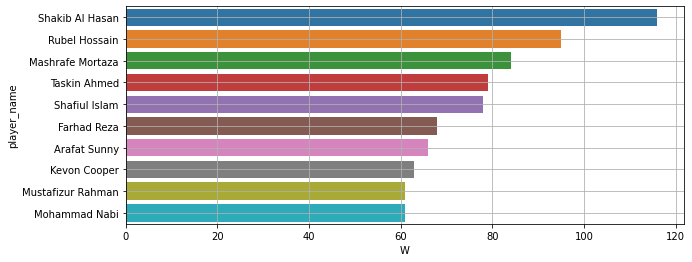

In [67]:
plt.figure(figsize= (10,4))
sns.barplot(x=top_bowlers.head(10)['W'], y=top_bowlers.head(10)['W'].keys())
plt.grid()
plt.show()

### Top ten batsman in run

In [68]:
top_batsmans = batsman.groupby(['player_name']).sum().sort_values('R', ascending=False)
top_batsmans.head(10)['R']

player_name
Tamim Iqbal        2483
Mushfiqur Rahim    2408
Mahmudullah        2014
Imrul Kayes        1909
Sabbir Rahman      1710
Anamul Haque       1676
Mohammad Mithun    1627
Shakib Al Hasan    1620
Chris Gayle        1599
Mominul Haque      1327
Name: R, dtype: int64

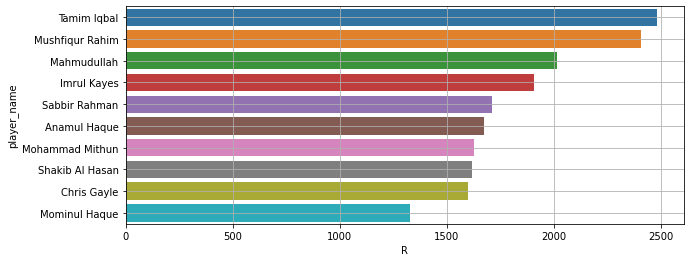

In [69]:
plt.figure(figsize= (10,4))
sns.barplot(x=top_batsmans.head(10)['R'], y=top_batsmans.head(10)['R'].keys())
plt.grid()
plt.show()

### Top ten sixers

In [70]:
top_sixers = batsman.groupby(['player_name']).sum().sort_values('sixs', ascending=False)
top_sixers.head(10)['sixs']

player_name
Chris Gayle        139
Tamim Iqbal         80
Imrul Kayes         80
Mushfiqur Rahim     75
Mahmudullah         74
Sabbir Rahman       70
Andre Russell       67
Mohammad Mithun     61
Anamul Haque        58
Evin Lewis          57
Name: sixs, dtype: int64

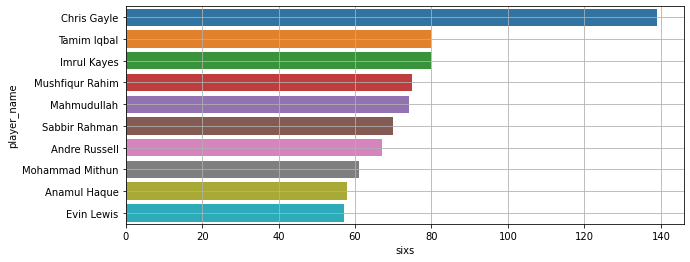

In [71]:
plt.figure(figsize= (10,4))
sns.barplot(x=top_sixers.head(10)['sixs'], y=top_sixers.head(10)['sixs'].keys())
plt.grid()
plt.show()

## Data Preparation for BPL Match prediction

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [73]:
en_bpl = bpl.copy()
en_bpl = en_bpl[en_bpl['winner'] != 'Match']
en_bpl

,id,season,match_no,date,team_1,team_2,player_of_match,toss_winner,toss_decision,winner,...,city,win_by_wickets,win_by_runs,result,umpire_1,umpire_2,team_1_run,team_1_wicket,team_2_run,team_2_wicket
0,0,2011/12,Final,Feb 29 2012,Barishal,Dhaka,Imran Nazir,Dhaka,field first,Dhaka,...,Mirpur,8,0,8 wickets,David Orchard,Enamul Haque,140,7,144,2
1,30,2011/12,3rd,Feb 11 2012,Khulna,Dhaka,Andre Russell,Khulna,bat first,Khulna,...,Mirpur,0,19,19 runs,Jeremy Lloyds,Sharfuddoula,175,5,156,7
2,26,2011/12,7th,Feb 13 2012,Barishal,Khulna,Dwayne Smith,Khulna,field first,Khulna,...,Mirpur,7,0,7 wickets,Enamul Haque,Jeremy Lloyds,125,0,131,3
3,29,2011/12,4th,Feb 11 2012,Barishal,Rajshahi,Ahmed Shehzad,Barishal,bat first,Barishal,...,Mirpur,0,22,22 runs,David Orchard,Gazi Sohel,180,2,158,9
4,28,2011/12,5th,Feb 12 2012,Khulna,Chittagong,Nasir Jamshed,Khulna,bat first,Chittagong,...,Mirpur,6,0,6 wickets,David Orchard,Enamul Haque,171,3,174,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,6,2011/12,27th,Feb 26 2012,Khulna,Rajshahi,Sean Ervine,Khulna,bat first,Rajshahi,...,Mirpur,8,0,8 wickets,David Orchard,Nadir Shah,106,0,110,2
307,5,2011/12,28th,Feb 26 2012,Chittagong,Barishal,Brad Hodge,Barishal,field first,Barishal,...,Mirpur,5,0,5 wickets,Gazi Sohel,Jeremy Lloyds,150,9,151,5
308,4,2011/12,29th,Feb 27 2012,Dhaka,Rajshahi,Mohammad Sami,Dhaka,bat first,Rajshahi,...,Mirpur,3,0,3 wickets,Mahfuzur Rahman,Nadir Shah,116,0,120,7
309,2,2011/12,1st,Feb 28 2012,Rajshahi,Barishal,Ahmed Shehzad,Barishal,field first,Barishal,...,Mirpur,8,0,8 wickets,David Orchard,Sharfuddoula,184,6,189,2


In [74]:
# en_bpl[en_bpl['toss_winner'] == en_bpl['team_1']]
en_bpl['team_1_toss_win'] = np.where(en_bpl['toss_winner'] == en_bpl['team_1'], 1, 0)
en_bpl['team_1_win'] = np.where(en_bpl['winner'] == en_bpl['team_1'], 1, 0)

# en_bpl.head()

In [75]:
teams = list(en_bpl['team_1'].value_counts().keys())
dic = {}
for i, team in enumerate(teams):
    dic[team] = i
dic

{'Dhaka': 0,
 'Chittagong': 1,
 'Khulna': 2,
 'Sylhet': 3,
 'Rangpur': 4,
 'Rajshahi': 5,
 'Barishal': 6,
 'Comilla': 7}

In [76]:
en_bpl['team_1'].replace(dic, inplace=True)
en_bpl['team_2'].replace(dic, inplace=True)
en_bpl['winner'].replace(dic, inplace=True)

le = LabelEncoder()
en_bpl['toss_decision'] = le.fit_transform(en_bpl['toss_decision'])
en_bpl['venue'] = le.fit_transform(en_bpl['venue'])


en_bpl.tail(10)

,id,season,match_no,date,team_1,team_2,player_of_match,toss_winner,toss_decision,winner,...,win_by_runs,result,umpire_1,umpire_2,team_1_run,team_1_wicket,team_2_run,team_2_wicket,team_1_toss_win,team_1_win
301,13,2011/12,20th,Feb 20 2012,2,1,Nasir Hossain,Chittagong,1,2,...,44,44 runs,David Orchard,Sharfuddoula,137,6,93,0,0,1
302,10,2011/12,23rd,Feb 24 2012,1,0,Dwayne Bravo,Dhaka,1,1,...,13,13 runs,David Orchard,Nadir Shah,120,6,107,9,0,1
303,9,2011/12,24th,Feb 24 2012,5,3,Sohail Tanvir,Sylhet,1,3,...,0,9 wickets,Anisur Rahman,Jeremy Lloyds,124,9,125,1,0,0
304,8,2011/12,25th,Feb 25 2012,6,0,Imran Nazir,Dhaka,1,0,...,0,5 wickets,Jeremy Lloyds,Nadir Shah,156,6,160,5,0,0
305,7,2011/12,26th,Feb 25 2012,3,1,Peter Trego,Chittagong,1,3,...,35,35 runs,David Orchard,Masudur Rahman,165,3,130,8,0,1
306,6,2011/12,27th,Feb 26 2012,2,5,Sean Ervine,Khulna,0,5,...,0,8 wickets,David Orchard,Nadir Shah,106,0,110,2,1,0
307,5,2011/12,28th,Feb 26 2012,1,6,Brad Hodge,Barishal,1,6,...,0,5 wickets,Gazi Sohel,Jeremy Lloyds,150,9,151,5,0,0
308,4,2011/12,29th,Feb 27 2012,0,5,Mohammad Sami,Dhaka,0,5,...,0,3 wickets,Mahfuzur Rahman,Nadir Shah,116,0,120,7,1,0
309,2,2011/12,1st,Feb 28 2012,5,6,Ahmed Shehzad,Barishal,1,6,...,0,8 wickets,David Orchard,Sharfuddoula,184,6,189,2,0,0
310,1,2011/12,2nd,Feb 28 2012,0,2,Azhar Mahmood,Dhaka,0,0,...,9,9 runs,Enamul Haque,Nadir Shah,191,4,182,7,1,1


In [77]:
# en_bpl = pd.get_dummies(data = en_bpl, columns = ['toss_decision' ])
en_bpl.columns

Index(['id', 'season', 'match_no', 'date', 'team_1', 'team_2',
       'player_of_match', 'toss_winner', 'toss_decision', 'winner', 'venue',
       'city', 'win_by_wickets', 'win_by_runs', 'result', 'umpire_1',
       'umpire_2', 'team_1_run', 'team_1_wicket', 'team_2_run',
       'team_2_wicket', 'team_1_toss_win', 'team_1_win'],
      dtype='object')

In [78]:
x = en_bpl[['team_1', 'team_2', 'team_1_toss_win', 'toss_decision', 'venue', 'winner']]
y = en_bpl['team_1_win']

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [80]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print('Naive Bayes classifier for Gaussian Nomial accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))

Naive Bayes classifier for Gaussian Nomial accuracy: 0.4409


## Build Models

In [81]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
y_pred = mnb.predict(x_test)
accuracy_score(y_test, y_pred)
print('Naive Bayes classifier for multinomial models accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)*100))

Naive Bayes classifier for multinomial models accuracy: 50.5376


In [82]:
# import pickle
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print('SVC accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)*100))

SVC accuracy: 89.2473


In [83]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print('MAE: ', metrics.mean_absolute_error(y_test , y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  0.4965785534492361
MSE:  0.25709054557340155
RMSE:  0.5070409703104883


In [84]:
from sklearn.ensemble import RandomForestClassifier

randomForest= RandomForestClassifier(n_estimators=100)
randomForest.fit(x_train, y_train)
y_pred = randomForest.predict(x_test)
print('Random Forest Classifier accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)*100))

Random Forest Classifier accuracy: 91.3978


In [85]:
from sklearn.tree import DecisionTreeClassifier

dml = DecisionTreeClassifier()
dml.fit(x_train, y_train)
y_pred = dml.predict(x_test)
print("Decision Tree Classifier accuracy: {:.4f}".format(accuracy_score(y_test,y_pred)*100))

Decision Tree Classifier accuracy: 86.0215


In [86]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
print("KNN Classification accuracy: {:.4f}".format(accuracy_score(y_test,y_pred)*100))

KNN Classification accuracy: 86.0215
